In [1]:
import sys
import os
import pickle
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

# Add the src directory to sys.path
src_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(src_path)

import src as fa
from src.PrePipelineSteps import Pycromanager2NativeDataType, Make_Output_Dir_JF, Make_Analysis_Dir_JF, \
                                    ConsolidateImageShapes, TrimZSlices, AutomaticSpotDetection_JF

from src.PipelineSteps import CellSegmentationStepClass_JF, BIGFISH_SpotDetection, SimpleCellposeSegmentaion

from src.PostPipelineSteps import BuildPDFReport, SaveSpotDetectionResults, SaveMasksToAnalysis, SendAnalysisToNAS

from src import Experiment, PipelineSettings, ScopeClass, PipelineDataClass, Pipeline

print('Will it blend?')

Will it blend?


In [2]:
raw_data_dir = r'C:\Users\Jack\Desktop\H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_2'

# Build Setting Classes
pipelineSettings = PipelineSettings(user_select_number_of_images_to_run=10, local_or_NAS=0, display_plots=False)
pipelineSettings.verbose = 0
pipelineSettings.bigfish_min_threshold = 0
pipelineSettings.bigfish_alpha = 0.5
pipelineSettings.bigfish_min_threshold = 50
pipelineSettings.cellpose_diameter = 150

terminatorScope = ScopeClass()

experiment = Experiment(raw_data_dir)
experiment.cytoChannel = [0]
experiment.nucChannel = [0]
experiment.FISHChannel = [0]

pipelineData = PipelineDataClass()

In [3]:
# Create Pipeline 
prePipelineSteps = [Pycromanager2NativeDataType(), Make_Output_Dir_JF(), Make_Analysis_Dir_JF(), ConsolidateImageShapes(), TrimZSlices(), AutomaticSpotDetection_JF()]
pipelineSteps = [SimpleCellposeSegmentaion(), BIGFISH_SpotDetection()]
postPipelineSteps = [BuildPDFReport(), SaveSpotDetectionResults(), SaveMasksToAnalysis()]
pipeline = Pipeline(pipelineSettings, terminatorScope, experiment, pipelineData, prePipelineSteps, postPipelineSteps, pipelineSteps)


Image shape:  (225, 11, 512, 512) 

Number of images:  1 

Local directory with images:  C:\Users\Jack\Desktop\H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_2 

Dataset opened                 
Number of z slices:  11 
 Number of color channels:  1 
Number of FOV:  225 
 Number of TimePoints 1 
 
 

<src.PrePipelineSteps.DataTypeBridges.Pycromanager2NativeDataType object at 0x000001E3AA395E70> did not return a value
Make_Output_Dir_JF
Make_Analysis_Dir_JF
ConsolidateImageShapes
Overwriting list_images in pipelineData
TrimZSlices
Overwriting list_images in pipelineData
AutomaticSpotDetection_JF


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


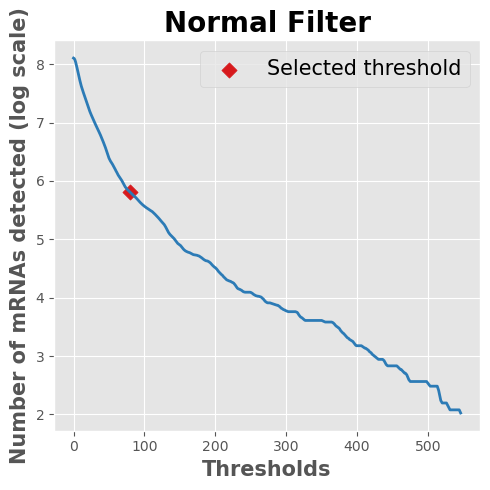

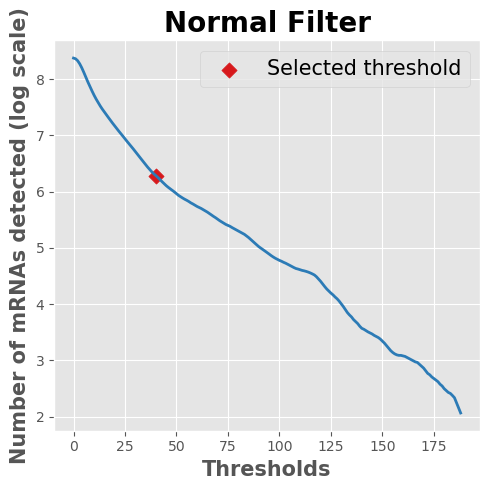

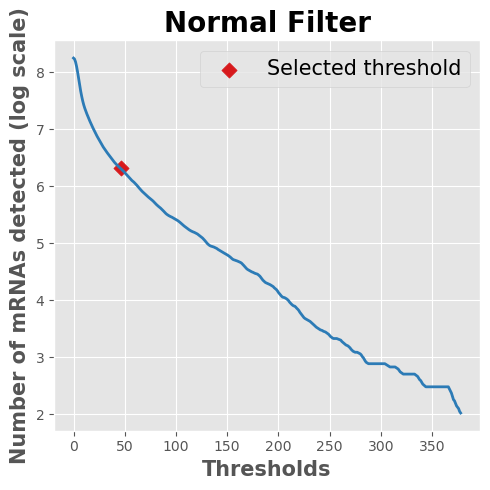

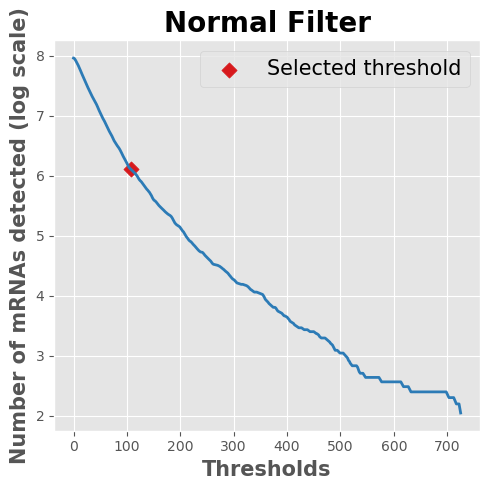

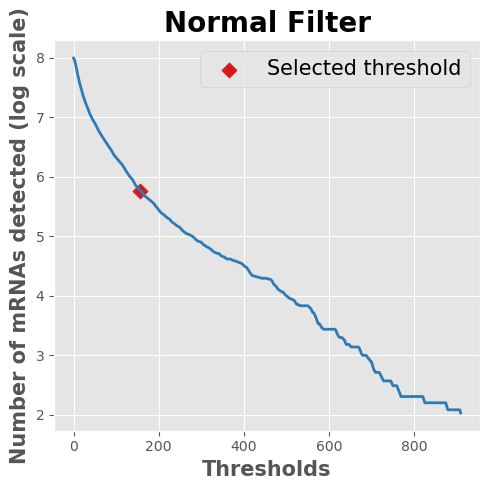

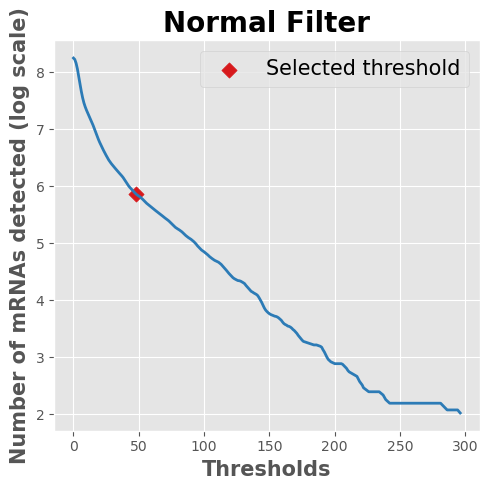

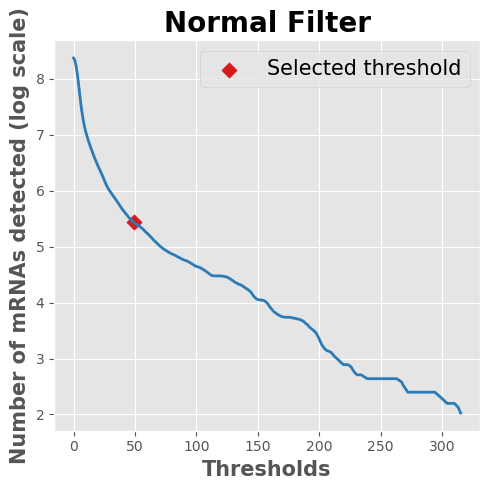

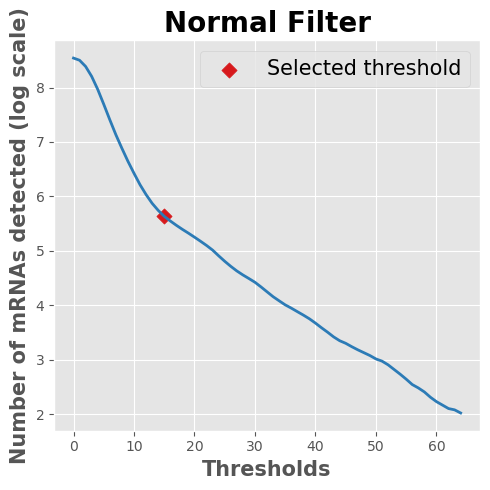

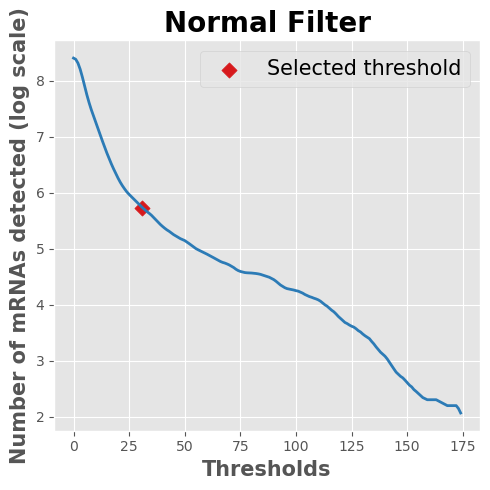

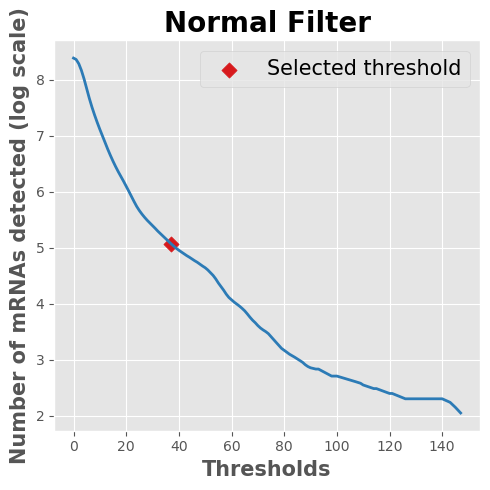

In [4]:
# Run pre pipeline steps
runPreProcessing = True
if runPreProcessing:
    pipeline.run_pre_pipeline_steps()
    pickle.dump(pipeline.pipelineData, open('PrePipelineData.pkl', 'wb'))
    pickle.dump(pipeline.experiment, open('Experiment.pkl', 'wb'))


pipelineData = pickle.load(open('PrePipelineData.pkl', 'rb'))
experiment = pickle.load(open('Experiment.pkl', 'rb'))
pipeline.pipelineData = pipelineData
pipeline.experiment = experiment


In [5]:
# Run pipeline steps
runPipeline = True
if runPipeline:
    pipeline.run_pipeline_steps()
    pickle.dump(pipeline.pipelineData, open('pipelineData.pkl', 'wb'))


pipelineData = pickle.load(open('pipelineData.pkl', 'rb'))
pipeline.pipelineData = pipelineData


INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3



 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_0.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
DEBUG:numba.core.byteflow:bytecode dump:
>          0	NOP(arg=None, lineno=103)
           2	LOAD_GLOBAL(arg=0, lineno=117)
           4	LOAD_METHOD(arg=1, lineno=117)
           6	LOAD_GLOBAL(arg=2, lineno=117)
           8	LOAD_FAST(arg=1, lineno=117)
          10	CALL_FUNCTION(arg=1, lineno=117)
          12	LOAD_CONST(arg=1, lineno=117)
          14	BUILD_TUPLE(arg=2, lineno=117)
          16	LOAD_CONST(arg=2, lineno=117)
          18	CALL_METHOD(arg=2, lineno=117)
          20	STORE_FAST(arg=2, lineno=117)
          22	LOAD_GLOBAL(arg=0, lineno=118)
          24	LOAD_METHOD(arg=1, lineno=118)
          26	LOAD_GLOBAL(arg=2, lineno=118)
          28	LOAD_FAST(arg=1, lineno=118)
          30	CALL_FUNCTION(arg=1, lineno=118)
          32	BUILD_TUPLE(arg=1, lineno=118)
          34	LOAD_CONST(arg=2, li


 ###################### 
        IMAGE : 1
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_1.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.30 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 2
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_2.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.33 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 3
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_3.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.29 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 4
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_4.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.35 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 5
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_5.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.31 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 6
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_6.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.32 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 7
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_7.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.31 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 8
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_8.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.43 sec
INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\Jack\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [[0, 0]]
INFO:cellpose.models:~~~ FINDING MASKS ~~~



 ###################### 
        IMAGE : 9
 ###################### 
    Image Name :   H128_Tiles_100ms_5mW_Blue_15x15_10z_05step_NDTiffStack_tp_0_fov_9.tif
    Original Image Shape :                     [11, 512, 512, 1]
    Trimmed z_slices at each border :         0


INFO:cellpose.models:>>>> TOTAL TIME 0.39 sec


In [6]:
# Run post pipeline steps
pipeline.run_post_pipeline_steps()

pickle.dump(pipeline.pipelineData, open('PostPipelineData.pkl', 'wb'))

BuildPDFReport
SaveSpotDetectionResults
SaveMasksToAnalysis


In [7]:
print('It will blend!')

It will blend!
